In [ ]:
#They say 80% of revenue is driven by 20% of the customers, is this really true? we shall investigate
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt



In [ ]:
#importing the data
data = pd.read_excel("Online Retail.xlsx")

In [ ]:
#checking out the columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total Order Value'],
      dtype='object')

In [ ]:
#checking for nulls
data.isnull().sum()

InvoiceNo                 0
StockCode                 0
Description            1454
Quantity                  0
InvoiceDate               0
UnitPrice                 0
CustomerID           135080
Country                   0
Total Order Value         0
dtype: int64

In [ ]:
#observing the data types
data.dtypes

InvoiceNo                    object
StockCode                    object
Description                  object
Quantity                      int64
InvoiceDate          datetime64[ns]
UnitPrice                   float64
CustomerID                  float64
Country                      object
Total Order Value           float64
dtype: object

In [ ]:
#getting the total number of duplicates
data.duplicated().sum()

np.int64(5268)

In [ ]:
#checking the structure of null data
data[data['Description'].isnull() | data['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Order Value
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,0.00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,4.96
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,10.79


In [ ]:
#dropping nulls since they can interfere with our analysis and storing new data into a new dataframe
rfmdata = data.dropna(subset=['CustomerID']).reset_index(drop=True)

In [ ]:
#no nulls left
rfmdata.isnull().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Total Order Value    0
dtype: int64

In [ ]:
#dropping duplicates since every row must be a unique order
rfmdata.drop_duplicates(inplace=True)

In [ ]:
#no duplicates anymore
rfmdata[rfmdata.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Order Value


In [ ]:
#checking the new data's datatypes
rfmdata.dtypes

InvoiceNo                    object
StockCode                    object
Description                  object
Quantity                      int64
InvoiceDate          datetime64[ns]
UnitPrice                   float64
CustomerID                  float64
Country                      object
Total Order Value           float64
dtype: object

In [ ]:
#resetting index
rfmdata.reset_index(inplace=True,drop=True)

In [ ]:
#making sure there are no negative unit prices, negative quantities represent returns and are OK
rfmdata.sort_values(by = ['UnitPrice'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Order Value
311019,572893,21208,PASTEL COLOUR HONEYCOMB FAN,5,2011-10-26 14:36:00,0.00,18059.0,United Kingdom,0.00
226962,564651,21786,POLKADOT RAIN HAT,144,2011-08-26 14:19:00,0.00,14646.0,Netherlands,0.00
226961,564651,22955,36 FOIL STAR CAKE CASES,144,2011-08-26 14:19:00,0.00,14646.0,Netherlands,0.00
226960,564651,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,192,2011-08-26 14:19:00,0.00,14646.0,Netherlands,0.00
338170,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.00,13081.0,United Kingdom,0.00
...,...,...,...,...,...,...,...,...,...
189323,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448.0,United Kingdom,-4287.63
119916,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom,-6930.00
119809,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom,-8142.75
119907,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75


In [ ]:
#checking postage transactions in the UK
rfmdata[(rfmdata['StockCode']=='POST') & (rfmdata['Country'] =='United Kingdom')].sort_values(by=['Quantity'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Order Value
9296,C537414,POST,POSTAGE,-1,2010-12-06 15:09:00,4.41,16861.0,United Kingdom,-4.41
21507,C539063,POST,POSTAGE,-1,2010-12-15 16:50:00,12.34,15107.0,United Kingdom,-12.34
21522,C539073,POST,POSTAGE,-1,2010-12-15 17:08:00,3.50,12971.0,United Kingdom,-3.50
25507,C539712,POST,POSTAGE,-1,2010-12-21 12:40:00,5.75,15602.0,United Kingdom,-5.75
33401,C540841,POST,POSTAGE,-1,2011-01-11 16:14:00,12.99,15602.0,United Kingdom,-12.99
...,...,...,...,...,...,...,...,...,...
262960,568398,POST,POSTAGE,1,2011-09-27 10:26:00,5.00,14543.0,United Kingdom,5.00
291572,571111,POST,POSTAGE,1,2011-10-13 16:37:00,15.00,14976.0,United Kingdom,15.00
203279,562037,POST,POSTAGE,3,2011-08-02 09:34:00,15.00,13023.0,United Kingdom,45.00
279685,569904,POST,POSTAGE,3,2011-10-06 16:27:00,15.00,13023.0,United Kingdom,45.00


In [ ]:
#converting InvoiceDate to timestamp and then to date using a custom function
rfmdata['InvoiceDate'] = pd.to_datetime(rfmdata['InvoiceDate'])

def ts2date(ts):
    return ts.date()

#converting timestamps to datetime dates and checking
rfmdata['InvoiceDate'] = rfmdata['InvoiceDate'].apply(ts2date)
rfmdata['InvoiceDate'].iloc[0]

datetime.date(2010, 12, 1)

In [95]:
#defining today 5 days after the most recent date as if we were doing this analysis in the past
tuhday = dt.date(2011,12,14)

print(tuhday)

tuhday - rfmdata['InvoiceDate'].max()




2011-12-14


datetime.timedelta(days=5)

In [ ]:
#creating a grouped object of customers to analyse
customers = rfmdata[['CustomerID','InvoiceDate','InvoiceNo','Total Order Value']].groupby('CustomerID')

In [ ]:
#calculating the most recent purchase date, no of times bought, and total money spent for each customer 
customerdata = customers.agg({'InvoiceDate':'max','InvoiceNo':'count','Total Order Value':'sum'}).reset_index()
customerdata

,CustomerID,InvoiceDate,InvoiceNo,Total Order Value
0,12346.0,2011-01-18,2,0.00
1,12347.0,2011-12-07,182,4310.00
2,12348.0,2011-09-25,31,1797.24
3,12349.0,2011-11-21,73,1757.55
4,12350.0,2011-02-02,17,334.40
...,...,...,...,...
4367,18280.0,2011-03-07,10,180.60
4368,18281.0,2011-06-12,7,80.82
4369,18282.0,2011-12-02,13,176.60
4370,18283.0,2011-12-06,721,2045.53


In [ ]:
#renaming columns for convienience
customerdata.rename(columns = {'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total Order Value':'Monetary'},inplace=True)
customerdata

,CustomerID,Recency,Frequency,Monetary
0,12346.0,2011-01-18,2,0.00
1,12347.0,2011-12-07,182,4310.00
2,12348.0,2011-09-25,31,1797.24
3,12349.0,2011-11-21,73,1757.55
4,12350.0,2011-02-02,17,334.40
...,...,...,...,...
4367,18280.0,2011-03-07,10,180.60
4368,18281.0,2011-06-12,7,80.82
4369,18282.0,2011-12-02,13,176.60
4370,18283.0,2011-12-06,721,2045.53


In [ ]:
#calculating days since last purchase
customerdata['Recency'] = tuhday-customerdata['Recency']

In [ ]:
#making sure the values make sense
customerdata[['CustomerID','Recency']].sort_values(by='Recency')

,CustomerID,Recency
587,13113.0,"5 days, 0:00:00"
495,12985.0,"5 days, 0:00:00"
3440,17001.0,"5 days, 0:00:00"
556,13069.0,"5 days, 0:00:00"
61,12423.0,"5 days, 0:00:00"
...,...,...
3129,16583.0,"378 days, 0:00:00"
1334,14142.0,"378 days, 0:00:00"
552,13065.0,"378 days, 0:00:00"
4140,17968.0,"378 days, 0:00:00"


In [ ]:
#getting a feel for the data
customerdata

,CustomerID,Recency,Frequency,Monetary
0,12346.0,"330 days, 0:00:00",2,0.00
1,12347.0,"7 days, 0:00:00",182,4310.00
2,12348.0,"80 days, 0:00:00",31,1797.24
3,12349.0,"23 days, 0:00:00",73,1757.55
4,12350.0,"315 days, 0:00:00",17,334.40
...,...,...,...,...
4367,18280.0,"282 days, 0:00:00",10,180.60
4368,18281.0,"185 days, 0:00:00",7,80.82
4369,18282.0,"12 days, 0:00:00",13,176.60
4370,18283.0,"8 days, 0:00:00",721,2045.53


In [ ]:
#scoring customer Recency, Frequency and Monetary scores based on how good they are
customerdata['R']= pd.qcut(customerdata['Recency'],5,labels=[1,2,3,4,5])
customerdata['F']=pd.qcut(customerdata['Frequency'],5,labels=[1,2,3,4,5])
customerdata['M']=pd.qcut(customerdata['Monetary'],5,labels=[1,2,3,4,5])
customerdata

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\reshape\tile.py:594: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(x)


,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,"330 days, 0:00:00",2,0.00,5,1,1
1,12347.0,"7 days, 0:00:00",182,4310.00,1,5,5
2,12348.0,"80 days, 0:00:00",31,1797.24,4,3,4
3,12349.0,"23 days, 0:00:00",73,1757.55,2,4,4
4,12350.0,"315 days, 0:00:00",17,334.40,5,2,2
...,...,...,...,...,...,...,...
4367,18280.0,"282 days, 0:00:00",10,180.60,5,1,1
4368,18281.0,"185 days, 0:00:00",7,80.82,5,1,1
4369,18282.0,"12 days, 0:00:00",13,176.60,1,1,1
4370,18283.0,"8 days, 0:00:00",721,2045.53,1,5,5


In [ ]:
#Recency scores should be inverted using a custom function because lower is better
def invscore(x):
    return 5 - (x-1)

customerdata['R']= customerdata['R'].apply(invscore)

customerdata

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,"330 days, 0:00:00",2,0.00,1,1,1
1,12347.0,"7 days, 0:00:00",182,4310.00,5,5,5
2,12348.0,"80 days, 0:00:00",31,1797.24,2,3,4
3,12349.0,"23 days, 0:00:00",73,1757.55,4,4,4
4,12350.0,"315 days, 0:00:00",17,334.40,1,2,2
...,...,...,...,...,...,...,...
4367,18280.0,"282 days, 0:00:00",10,180.60,1,1,1
4368,18281.0,"185 days, 0:00:00",7,80.82,1,1,1
4369,18282.0,"12 days, 0:00:00",13,176.60,5,1,1
4370,18283.0,"8 days, 0:00:00",721,2045.53,5,5,5


In [ ]:
#adding the scores to get a final RFM score
customerdata['RFM'] = customerdata['R'].astype(int)+customerdata['F'].astype(int)+customerdata['M'].astype(int)
customerdata

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,12346.0,"330 days, 0:00:00",2,0.00,1,1,1,3
1,12347.0,"7 days, 0:00:00",182,4310.00,5,5,5,15
2,12348.0,"80 days, 0:00:00",31,1797.24,2,3,4,9
3,12349.0,"23 days, 0:00:00",73,1757.55,4,4,4,12
4,12350.0,"315 days, 0:00:00",17,334.40,1,2,2,5
...,...,...,...,...,...,...,...,...
4367,18280.0,"282 days, 0:00:00",10,180.60,1,1,1,3
4368,18281.0,"185 days, 0:00:00",7,80.82,1,1,1,3
4369,18282.0,"12 days, 0:00:00",13,176.60,5,1,1,7
4370,18283.0,"8 days, 0:00:00",721,2045.53,5,5,5,15


In [ ]:
#checking data types
customerdata.dtypes

CustomerID     float64
Recency         object
Frequency        int64
Monetary       float64
R             category
F             category
M             category
RFM              int64
dtype: object

In [ ]:
#labelling customers based on how high their score is
def value(rfm):
    if 3<= rfm < 8:
        return "Low"
    elif 8<= rfm < 12:
        return "Medium"
    else:
        return "High"
    
customerdata['Value'] = customerdata['RFM'].apply(value)
customerdata['Value'] = customerdata['Value'].astype('category')
desired_order = ['Low', 'Medium', 'High']

customerdata.dtypes



CustomerID     float64
Recency         object
Frequency        int64
Monetary       float64
R             category
F             category
M             category
RFM              int64
Value         category
dtype: object

In [ ]:
#converting Value column to categorical to do aggregations and stuff later
customerdata['Value']=pd.Categorical(customerdata['Value'],categories=desired_order,ordered=True)
customerdata

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Value
0,12346.0,"330 days, 0:00:00",2,0.00,1,1,1,3,Low
1,12347.0,"7 days, 0:00:00",182,4310.00,5,5,5,15,High
2,12348.0,"80 days, 0:00:00",31,1797.24,2,3,4,9,Medium
3,12349.0,"23 days, 0:00:00",73,1757.55,4,4,4,12,High
4,12350.0,"315 days, 0:00:00",17,334.40,1,2,2,5,Low
...,...,...,...,...,...,...,...,...,...
4367,18280.0,"282 days, 0:00:00",10,180.60,1,1,1,3,Low
4368,18281.0,"185 days, 0:00:00",7,80.82,1,1,1,3,Low
4369,18282.0,"12 days, 0:00:00",13,176.60,5,1,1,7,Low
4370,18283.0,"8 days, 0:00:00",721,2045.53,5,5,5,15,High


In [ ]:
#counting no of customers in each segment and also calculating the percent
valuecounts = customerdata[['Value','CustomerID']].groupby(by='Value').count()
valuecounts.reset_index(inplace=True)
valuecounts['Count'] = valuecounts['CustomerID']
valuecounts['Percentc'] = valuecounts['Count']*100/valuecounts['Count'].sum()
valuecounts


C:\Users\HP\AppData\Local\Temp\ipykernel_26264\678696508.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valuecounts = customerdata[['Value','CustomerID']].groupby(by='Value').count()


,Value,CustomerID,Count,Percentc
0,Low,1666,1666,38.106130
1,Medium,1444,1444,33.028362
2,High,1262,1262,28.865508


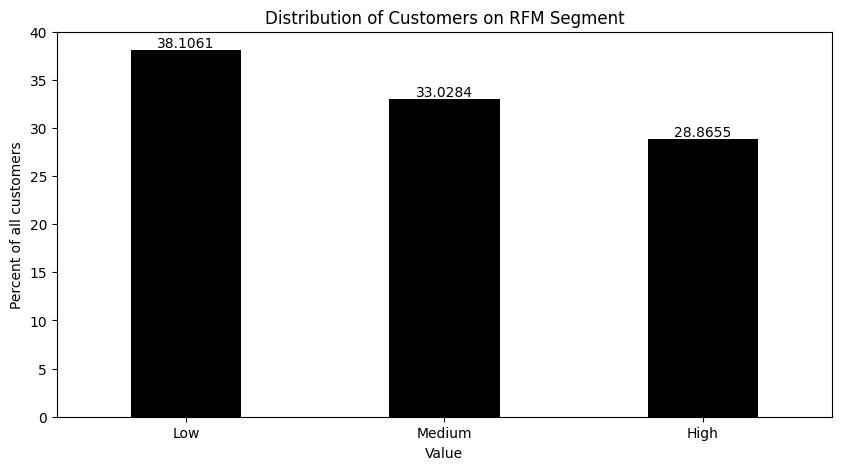

In [ ]:
#plotting the Distribution of Customers on RFM Segment
plt.figure(figsize = (10,5))
plt.ylabel('Percent of all customers')
plt.title('Distribution of Customers on RFM Segment')
ax = sns.barplot(valuecounts,x='Value',y='Percentc',width=0.427,color = 'black')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
#calculating total revenue per RFM segment
monetaryvalue = customerdata[['Value','Monetary']].groupby(by='Value').sum()
monetaryvalue.reset_index(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_26264\2176621368.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monetaryvalue = customerdata[['Value','Monetary']].groupby(by='Value').sum()


In [ ]:
#calculating total percent of revenue made by each segment
monetaryvalue['Percentrev']=monetaryvalue['Monetary']*100/monetaryvalue['Monetary'].sum()
monetaryvalue

,Value,Monetary,Percentrev
0,Low,468398.872,5.658003
1,Medium,1424498.032,17.207159
2,High,6385622.520,77.134838


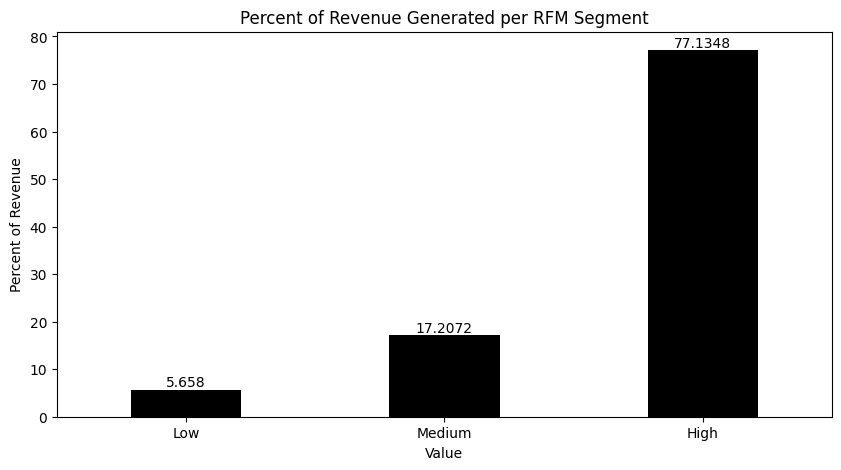

In [ ]:
#plotting the Percent of Revenue Generated per RFM Segment
plt.figure(figsize = (10,5))
plt.ylabel('Percent of Revenue')
plt.title('Percent of Revenue Generated per RFM Segment')
ax = sns.barplot(monetaryvalue,x='Value',y='Percentrev',width=0.427,color='black')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
#we can clearly see the pareto principle is true, high value customers make up 28.86% of all customers but generate 77.13% of the total revenue
#you could really look at everything about high value customers, countries they're from, dates and time periods they joined in, etc. 
#creating a copy of the segmented customer data
cdatacopy = customerdata.copy()

In [ ]:
#adding country data to the customer data
cdatacountry = cdatacopy.merge(rfmdata[['CustomerID','Country']],how='inner',on='CustomerID').groupby(by=['CustomerID','Country']).max()

cdatacountry.reset_index(inplace=True)
cdatacountry

,CustomerID,Country,Recency,Frequency,Monetary,R,F,M,RFM,Value
0,12346.0,United Kingdom,"330 days, 0:00:00",2,0.00,1,1,1,3,Low
1,12347.0,Iceland,"7 days, 0:00:00",182,4310.00,5,5,5,15,High
2,12348.0,Finland,"80 days, 0:00:00",31,1797.24,2,3,4,9,Medium
3,12349.0,Italy,"23 days, 0:00:00",73,1757.55,4,4,4,12,High
4,12350.0,Norway,"315 days, 0:00:00",17,334.40,1,2,2,5,Low
...,...,...,...,...,...,...,...,...,...,...
4375,18280.0,United Kingdom,"282 days, 0:00:00",10,180.60,1,1,1,3,Low
4376,18281.0,United Kingdom,"185 days, 0:00:00",7,80.82,1,1,1,3,Low
4377,18282.0,United Kingdom,"12 days, 0:00:00",13,176.60,5,1,1,7,Low
4378,18283.0,United Kingdom,"8 days, 0:00:00",721,2045.53,5,5,5,15,High


In [ ]:
#checking for duplicates in the new data
#these customers have brought while in different countries
cdatacountry[cdatacountry['CustomerID'].duplicated(keep='first') | cdatacountry['CustomerID'].duplicated(keep='last')]

,CustomerID,Country,Recency,Frequency,Monetary,R,F,M,RFM,Value
20,12370.0,Austria,"56 days, 0:00:00",166,3541.94,3,5,5,13,High
21,12370.0,Cyprus,"56 days, 0:00:00",166,3541.94,3,5,5,13,High
39,12394.0,Belgium,"68 days, 0:00:00",27,1272.48,3,2,4,9,Medium
40,12394.0,Denmark,"68 days, 0:00:00",27,1272.48,3,2,4,9,Medium
58,12417.0,Belgium,"8 days, 0:00:00",198,3578.80,5,5,5,15,High
59,12417.0,Spain,"8 days, 0:00:00",198,3578.80,5,5,5,15,High
63,12422.0,Australia,"100 days, 0:00:00",39,803.56,2,3,3,8,Medium
64,12422.0,Switzerland,"100 days, 0:00:00",39,803.56,2,3,3,8,Medium
71,12429.0,Austria,"14 days, 0:00:00",97,3750.40,5,4,5,14,High
72,12429.0,Denmark,"14 days, 0:00:00",97,3750.40,5,4,5,14,High


In [97]:
#seeing where high value customers are from
cdatacountry[cdatacountry['Value']=='High'][['Country']].value_counts()

Country        
United Kingdom     1120
France               36
Germany              34
Belgium              11
Spain                 9
Switzerland           6
Portugal              6
Italy                 5
Norway                5
Finland               4
Austria               4
Channel Islands       4
Australia             3
EIRE                  3
Sweden                2
Denmark               2
Cyprus                2
Netherlands           2
Canada                1
Malta                 1
Iceland               1
Israel                1
Japan                 1
Poland                1
Singapore             1
USA                   1
Name: count, dtype: int64

In [ ]:
#seeing how much revenue high value customers from each country have generated

cdatacountry[cdatacountry['Value']=='High'][['Country','Monetary']].groupby(by='Country').sum().sort_values(by='Monetary',ascending=False)

,Monetary
Country,
United Kingdom,5090467.89
Netherlands,280840.26
EIRE,250001.78
Germany,169071.23
France,168440.45
Australia,132855.00
Spain,46681.10
Belgium,35501.10
Sweden,32627.95


In [ ]:
#getting the first purchase dates for each customer
joiningdates = rfmdata[['CustomerID','InvoiceDate']].groupby(by='CustomerID').min()
joiningdates.reset_index(inplace=True)
joiningdates

,CustomerID,InvoiceDate
0,12346.0,2011-01-18
1,12347.0,2010-12-07
2,12348.0,2010-12-16
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4367,18280.0,2011-03-07
4368,18281.0,2011-06-12
4369,18282.0,2011-08-05
4370,18283.0,2011-01-06


In [ ]:
#joining the dates with our customer data
highvaldates = pd.merge(cdatacountry[cdatacountry['Value']=='High'],joiningdates,on='CustomerID')
highvaldates

,CustomerID,Country,Recency,Frequency,Monetary,R,F,M,RFM,Value,InvoiceDate
0,12347.0,Iceland,"7 days, 0:00:00",182,4310.00,5,5,5,15,High,2010-12-07
1,12349.0,Italy,"23 days, 0:00:00",73,1757.55,4,4,4,12,High,2011-11-21
2,12356.0,Portugal,"27 days, 0:00:00",59,2811.43,4,4,5,13,High,2011-01-18
3,12357.0,Switzerland,"38 days, 0:00:00",131,6207.67,3,5,5,13,High,2011-11-06
4,12359.0,Cyprus,"12 days, 0:00:00",251,6182.98,5,5,5,15,High,2011-01-12
...,...,...,...,...,...,...,...,...,...,...,...
1261,18259.0,United Kingdom,"29 days, 0:00:00",42,2338.60,4,3,5,12,High,2010-12-08
1262,18260.0,United Kingdom,"177 days, 0:00:00",139,2580.15,2,5,5,12,High,2010-12-16
1263,18263.0,United Kingdom,"28 days, 0:00:00",62,1211.08,4,4,4,12,High,2011-04-01
1264,18272.0,United Kingdom,"7 days, 0:00:00",170,3064.78,5,5,5,15,High,2011-04-07


In [ ]:
#seeing if some customers made multiple purchases on their first day
highvaldates[highvaldates['CustomerID'].duplicated(keep='first')|highvaldates['CustomerID'].duplicated(keep='last')]

,CustomerID,Country,Recency,Frequency,Monetary,R,F,M,RFM,Value,InvoiceDate
8,12370.0,Austria,"56 days, 0:00:00",166,3541.94,3,5,5,13,High,2010-12-14
9,12370.0,Cyprus,"56 days, 0:00:00",166,3541.94,3,5,5,13,High,2010-12-14
19,12417.0,Belgium,"8 days, 0:00:00",198,3578.80,5,5,5,15,High,2010-12-17
20,12417.0,Spain,"8 days, 0:00:00",198,3578.80,5,5,5,15,High,2010-12-17
23,12429.0,Austria,"14 days, 0:00:00",97,3750.40,5,4,5,14,High,2010-12-09
24,12429.0,Denmark,"14 days, 0:00:00",97,3750.40,5,4,5,14,High,2010-12-09
25,12431.0,Australia,"40 days, 0:00:00",239,6348.89,3,5,5,13,High,2010-12-01
26,12431.0,Belgium,"40 days, 0:00:00",239,6348.89,3,5,5,13,High,2010-12-01


In [ ]:
#dropping duplicates since we don't want to double count
highvaldates = highvaldates.drop_duplicates(subset=['CustomerID']).reset_index(drop=True)
highvaldates

,CustomerID,Country,Recency,Frequency,Monetary,R,F,M,RFM,Value,InvoiceDate
0,12347.0,Iceland,"7 days, 0:00:00",182,4310.00,5,5,5,15,High,2010-12-07
1,12349.0,Italy,"23 days, 0:00:00",73,1757.55,4,4,4,12,High,2011-11-21
2,12356.0,Portugal,"27 days, 0:00:00",59,2811.43,4,4,5,13,High,2011-01-18
3,12357.0,Switzerland,"38 days, 0:00:00",131,6207.67,3,5,5,13,High,2011-11-06
4,12359.0,Cyprus,"12 days, 0:00:00",251,6182.98,5,5,5,15,High,2011-01-12
...,...,...,...,...,...,...,...,...,...,...,...
1257,18259.0,United Kingdom,"29 days, 0:00:00",42,2338.60,4,3,5,12,High,2010-12-08
1258,18260.0,United Kingdom,"177 days, 0:00:00",139,2580.15,2,5,5,12,High,2010-12-16
1259,18263.0,United Kingdom,"28 days, 0:00:00",62,1211.08,4,4,4,12,High,2011-04-01
1260,18272.0,United Kingdom,"7 days, 0:00:00",170,3064.78,5,5,5,15,High,2011-04-07


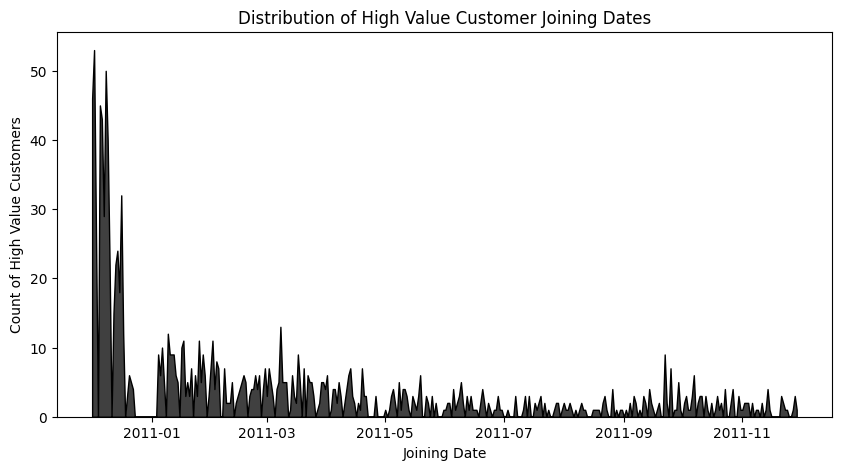

In [ ]:
#plotting when our high value customers joined for the first time
plt.figure(figsize = (10,5))
plt.ylabel('Count of High Value Customers')
plt.xlabel('Joining Date')
plt.title('Distribution of High Value Customer Joining Dates')
sns.histplot(highvaldates['InvoiceDate'],element='poly',color='black')
plt.show()

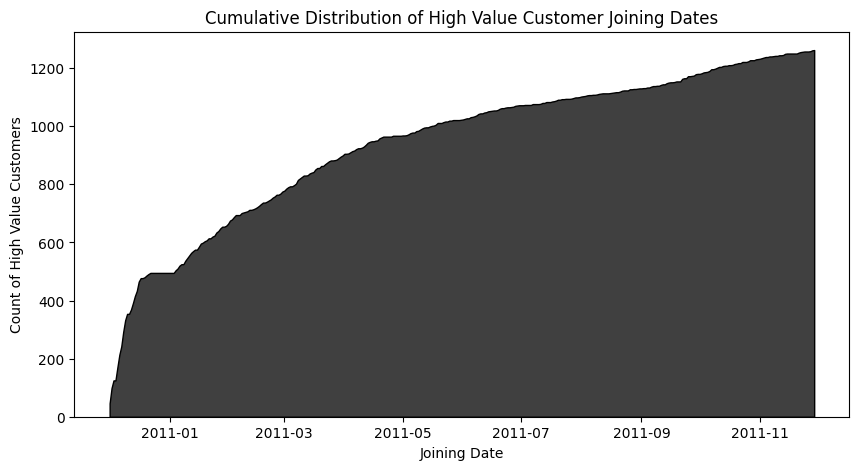

In [ ]:
#plotting a cumulative distribution of all our high value customers based on their joining dates
plt.figure(figsize = (10,5))
plt.ylabel('Count of High Value Customers')
plt.xlabel('Joining Date')
plt.title('Cumulative Distribution of High Value Customer Joining Dates')
sns.histplot(highvaldates['InvoiceDate'],element='poly',color='black',cumulative=True)
plt.show()

#it can be clearly seen most of the high value customers joined before May 2011, this is not good since it means our rate of acquiring high value customers has slowed down


In [ ]:
#checking for correlation between R,F and M scores
corrmatrix = customerdata[['R','F','M']].corr()

In [ ]:
#printing the matrix
corrmatrix

,R,F,M
R,1.000000,0.484096,0.466169
F,0.484096,1.000000,0.764842
M,0.466169,0.764842,1.000000


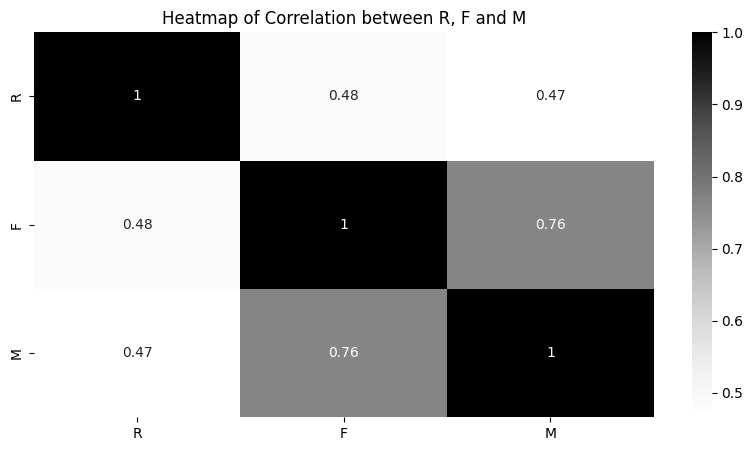

In [ ]:
#plotting the correlation matrix, darker is better
plt.figure(figsize = (10,5))
plt.title('Heatmap of Correlation between R, F and M')
sns.heatmap(corrmatrix,cmap="Greys",annot=True)
plt.show()
